In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sample = "Neige_2_3"

df = pd.read_csv(f"./data/{sample}_comp.csv")
dog =  df[df["rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
print(np.shape(dog))
bear = df[df["rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
print(np.shape(bear))
df2 = pd.read_csv(f"./data/{sample}_q30.csv")
dog_min =  df2[df2["rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
print(np.shape(dog))
bear_min = df2[df2["rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
print(np.shape(bear))

(3268, 9)
(362, 9)
(3268, 9)
(362, 9)


In [ ]:
### total reads dict
dict = {
"CX113C" : 85189435,
"CX113E" : 122730393,
"CX113F" : 73185240,
"CX113H" : 64548236,
"CX115H" : 101854526,
"CX1138" : 113670096,
"Neige_2_3" : 81278960,
"Neige_3_2" : 88475256,
"Neige_4" : 95450902
}
### q30 reads dict
dict2 = {
"CX113C" : 818025,
"CX113E" : 122730393,
"CX113F" : 73185240,
"CX113H" : 64548236,
"CX115H" : 101854526,
"CX1138" : 113670096,
"Neige_2_3" : 81278960,
"Neige_3_2" : 88475256,
"Neige_4" : 95450902
}

In [ ]:
### basic mapping stats for all reads
mapped_dog = dog["numreads"].sum()
print("Number of reads mapped to dog: ", mapped_dog, "(", mapped_dog/dict[sample]*100, "%)")
mapped_bear = bear["numreads"].sum()
print("Number of reads mapped to bear: ", mapped_bear, "(", mapped_bear/dict[sample]*100, "%)")
unmapped = dict[sample] - mapped_dog - mapped_bear
print("Number of unmapped reads: ", unmapped, "(", unmapped/dict[sample]*100, "%)")

Number of reads mapped to dog:  51826088 ( 63.76322728538849 %)
Number of reads mapped to bear:  20370208 ( 25.062092329921544 %)
Number of unmapped reads:  9082664 ( 11.17468038468996 %)


In [ ]:
## basic mapping stats for q30 reads
mapped_dog_min = dog_min["numreads"].sum()
print("Number of q30 reads mapped to dog: ", mapped_dog_min, "(", mapped_dog_min/dict2[sample]*100, "%)")
mapped_bear_min = bear_min["numreads"].sum()
print("Number of q30 reads mapped to bear: ", mapped_bear_min, "(", mapped_bear_min/dict2[sample]*100, "%)")
unmapped_min = dict[sample] - mapped_dog_min - mapped_bear_min
print("Number of q30 unmapped reads: ", unmapped_min, "(", unmapped_min/dict2[sample]*100, "%)")

Number of q30 reads mapped to dog:  28933114 ( 35.59729848905547 %)
Number of q30 reads mapped to bear:  91372 ( 0.11241777699911515 %)
Number of q30 unmapped reads:  52254474 ( 64.29028373394542 %)


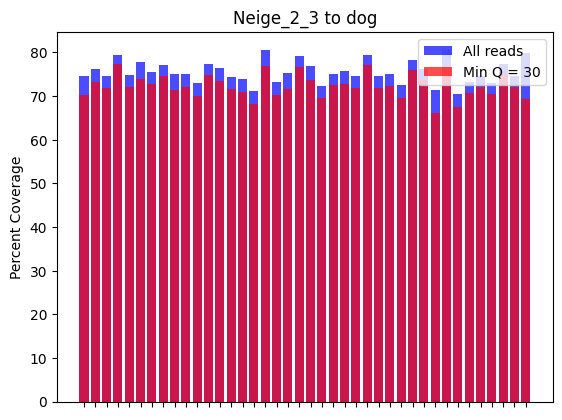

In [101]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(len(dog['rname'][0:40]))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot bars
ax.bar(x, dog['coverage'][0:40], width=bar_width, label='All reads', alpha=0.7, color='b')
ax.bar(x, dog_min['coverage'][0:40], width=bar_width, label='Min Q = 30', alpha=0.7, color='r')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels("")
ax.set_ylabel('Percent Coverage')
ax.set_title(f'{sample} to dog')

# Add legend
ax.legend()

# Show the plot
plt.show()

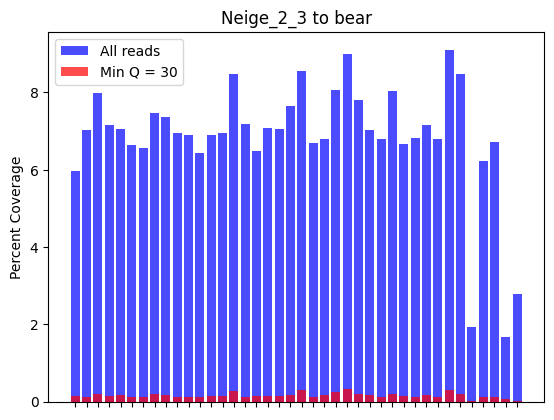

In [98]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(len(bear['rname'][0:40]))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot bars
ax.bar(x, bear['coverage'][0:40], width=bar_width, label='All reads', alpha=0.7, color='b')
ax.bar(x, bear_min['coverage'][0:40], width=bar_width, label='Min Q = 30', alpha=0.7, color='r')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels("")
ax.set_ylabel('Percent Coverage')
ax.set_title(f'{sample} to bear')

# Add legend
ax.legend()

# Show the plot
plt.show()

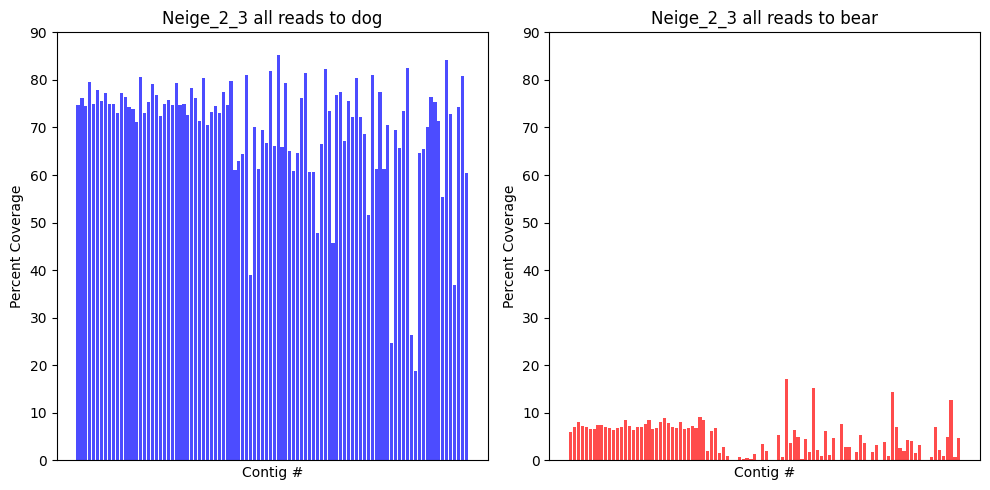

In [ ]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(100)
# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot bars
axes[0].bar(x, dog['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
axes[1].bar(x, bear['coverage'][0:100], width=bar_width, label='bear', alpha=0.7, color='r')

# Set labels and title
axes[0].set_xticks([])
axes[0].set_xticklabels("")
axes[0].set_ylabel('Percent Coverage')
axes[0].set_xlabel('Contig #')
axes[0].set_title(f'{sample} all reads to dog')
axes[0].set_ylim(0, 90)

axes[1].set_xticks([])
axes[1].set_xticklabels("")
axes[1].set_ylabel('Percent Coverage')
axes[1].set_xlabel('Contig #')
axes[1].set_title(f'{sample} all reads to bear')
axes[1].set_ylim(0, 90)

# Show the plot
plt.tight_layout()
plt.savefig(f"./figures/{sample}_pc_cov_all.png", dpi=600)
plt.show()

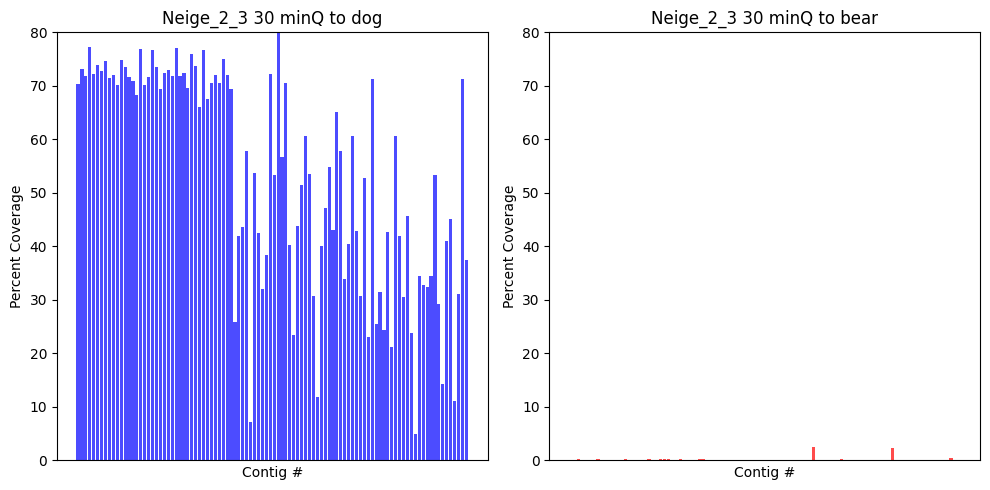

In [ ]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(100)
# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot bars
axes[0].bar(x, dog_min['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
axes[1].bar(x, bear_min['coverage'][0:100], width=bar_width, label='Bear', alpha=0.7, color='r')

# Set labels and title
axes[0].set_xticks([])
axes[0].set_xticklabels("")
axes[0].set_ylabel('Percent Coverage')
axes[0].set_xlabel('Contig #')
axes[0].set_title(f'{sample} 30 minQ to dog')
axes[0].set_ylim(0, 80)

axes[1].set_xticks([])
axes[1].set_xticklabels("")
axes[1].set_ylabel('Percent Coverage')
axes[1].set_xlabel('Contig #')
axes[1].set_title(f'{sample} 30 minQ to bear')
axes[1].set_ylim(0, 80)

# Show the plot
plt.tight_layout()
plt.savefig(f"./figures/{sample}_pc_cov_q30.png", dpi=600)
plt.show()